# ME314 Homework 5 (Template)

*Please note that a **single** PDF file will be the only document that you turn in, which will include your answers to the problems with corresponding derivations and any code used to complete the problems. When including the code, please make sure you also include **code outputs**, and you don't need to include example code. Problems and deliverables that should be included with your submission are shown in **bold**.*

*This Juputer Notebook file serves as a template for you to start homework, since we recommend to finish the homework using Jupyter Notebook. You can start with this notebook file with your local Jupyter environment, or upload it to Google Colab. You can include all the code and other deliverables in this notebook Jupyter Notebook supports $\LaTeX$ for math equations, and you can export the whole notebook as a PDF file. But this is not the only option, if you are more comfortable with other ways, feel free to do so, as long as you can submit the homework in a single PDF file.*

***

In [5]:
# ##############################################################################################
# # If you're using Google Colab, uncomment this section by selecting the whole section and press
# # ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice 
# # LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
# ##############################################################################################

# import sympy as sym
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
#     javascript(url=url)
#     return sym.printing.latex(exp,**options)
# sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Below are the help functions in previous homeworks, which you may need for this homework.

In [6]:
import numpy as np

def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.
    
    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt: 
        step size for integration

    Return
    ============
    new_xt: 
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 

In [7]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/singlepend.JPG' width=350' height='350'></table>"))

## Problem 1 (5pts)

Consider the single pendulum showed above, solve the Euler-Lagrange equations and simulate the system for $t\in[0,5]$ with $dt=0.01, R=1, m=1, g=9.8$ and initial condition as $\theta=\frac{\pi}{2}, \dot{\theta}=0$, and plot $\theta$ versus time. Note that in this problem there is no impact involved (ignore the wall at the bottom).

**Turn in: A copy of the code used to solve the El-equations and numerically simulate the system. Also include code output, which should be the plot of the trajectory versus time.**

In [15]:
import sympy as sym
from sympy import symbols, Matrix, Eq, Function, sin, cos, solve
from sympy.abc import t

th = Function(r'\theta')(t)
m = symbols('m')
r = symbols('R')
g = symbols('g')
l = symbols('L')

x = r*sin(th)
y = -r*cos(th)

q = Matrix([th])
qdot = q.diff(t)
qddot = qdot.diff(t)

xdot = x.diff(t)
ydot = y.diff(t)

ke = m*(xdot**2 + ydot**2) / 2
pe = m * g * y

ke = ke.subs({m:1, r:1, g:9.8})
pe = pe.subs({m:1, r:1, g:9.8})


L = ke - pe
display(Eq(l, L))
L_mat = Matrix([L])


dLdq = L_mat.jacobian(q).T
dLdqdot = L_mat.jacobian(qdot).T
d_dLdqdot_dt = dLdqdot.diff(t)

el = Eq(dLdq - d_dLdqdot_dt, Matrix([0]))

# print('=================================================')
# print()
# print("dLdq")
# display(dLdq)

# print('=================================================')
# print()
# print("dLdqdot")
# display(dLdqdot)

print('=================================================')
print()
print("Euler Lagrange equations for triple pendulum system")
display(el)
print()
print()


Eq(L, sin(\theta(t))**2*Derivative(\theta(t), t)**2/2 + cos(\theta(t))**2*Derivative(\theta(t), t)**2/2 + 9.8*cos(\theta(t)))


Euler Lagrange equations for triple pendulum system


Eq(Matrix([[-sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) - 9.8*sin(\theta(t)) - cos(\theta(t))**2*Derivative(\theta(t), (t, 2))]]), Matrix([[0]]))

In [24]:
from math import pi
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt


# solve for the equations of motion:
el_soln = solve(el, qddot)

for i in qddot:
    print('=================================================')
    print()
    display(Eq(i, el_soln[i]))
print()
print()

thddot_func = sym.lambdify([th, qdot[0],], el_soln[qddot[0]], modules = sym)


##############################################
def dyn(s):
    """
    System dynamics function (extended)
    
    Parameters
    ============
    s: NumPy array
        s = [theta1, theta2, theta3, theta1dot, theta2dot, theta3dot]
    
    Return
    ============
    sdot: NumPy array
        time derivative of input state vector,
        sdot = [theta1dot, theta2dot, theta3dot, theta1_ddot, theta2_ddot, theta3_ddot]
    """
    return np.array([s[1], thddot_func(s[0], s[1])])
    #Should be outputting theta1dot, theta2dot, theta1_ddot, theta2_ddot

# define initial state
s0 = np.array([pi/2, 0]) 
traj = simulate(dyn, s0, [0,5], 0.01, integrate) 
print()
print('shape of traj: ', traj.shape)

print()
print()


Eq(Derivative(\theta(t), (t, 2)), -49.0*sin(\theta(t))/(5.0*sin(\theta(t))**2 + 5.0*cos(\theta(t))**2))




shape of traj:  (2, 500)




theta trajectory


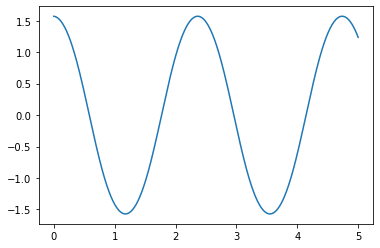

In [27]:
#plot the theta trajectories
num_pts = int(5/.01)
axis = np.linspace(0,5, num_pts )

print('theta trajectory')
plt.plot(axis, traj[0])
plt.show()

print()
print()


## Problem 2 (10pts)

Now, time for impact! As shown in the figure, there is wall such that the pendulum will hit the wall when $\theta=0$. Recall that in the course note, to solve the impact update rule, we have two set of equations:
$$
\begin{aligned}
\frac{\partial L}{\partial \dot{q}} \Big\vert^{\tau^+}_{\tau^-} & = \lambda \frac{\partial \phi}{\partial q} \\
\left[ \frac{\partial L}{\partial \dot{q}}\cdot\dot{q} - L(q,\dot{q}) \right] \Bigg\vert^{\tau^+}_{\tau^-} & = 0
\end{aligned}
$$
    
In this problem you will need to symbolically compute the following three expressions contained the equations above:
$$\frac{\partial L}{\partial \dot{q}}, \quad \frac{\partial \phi}{\partial q}, \quad \frac{\partial L}{\partial \dot{q}}\cdot\dot{q} - L(q,\dot{q})$$ (the third one is the Hamiltonian of the system). 

There is one more requirement: all three expressions can be considered as functions of $q$ and $\dot{q}$, you may previously define $q$ and $\dot{q}$ as SymPy's function objects, now you will need to substitute them with dummy symbols (using SymPy's subsititute method). Note that, $q$ and $\dot{q}$ should be two sets of separate symbols. 

**Turn in: A copy of code used to symbolically compute the three expressions, also include the outputs of your code, which should be the three expressions (make sure there is no SymPy Function(t) left!).**

## Problem 3 (10pts)

Now everything is ready to solve for the impact upate rules. Recall that for those equations to solve, you will need to evaluate them right before and after the impact time at $\tau^-$ and $\tau^+$. Here $\dot{q}(\tau^-)$ are actually same as the dummy symbols you defined in Problem 2 (why?), but you will need to define new dummy symbols for $\dot{q}(\tau^+)$. That is to say, $\frac{\partial L}{\partial \dot{q}}$ and $\frac{\partial L}{\partial \dot{q}}\cdot\dot{q} - L(q,\dot{q})$ evaluated at $\tau^-$ are those you already had in Problem 2, but you will need to substitute the dummy symbols of $\dot{q}(\tau^+)$ to evaluate them at $\tau^+$. 

Based on the information above, define the equations for impact update and solve them for impact update rules. After solving the impact update solution, numerically evalute it as a function using SymPy's lambdify method and test it with $\theta(\tau^-)=0.01, \dot{\theta}(\tau^-)=2$. Note that: 
1. In your equations and impact update solutions, there should be NO SymPy Function left (except for internal functions like $\sin$ or $\cos$).
2. You may wonder where are $q(\tau^-)$ and $q(\tau^+)$, the question is, do we really need new dummy variables for them?
3. The solution of the impact upate rules, which is obtained by solving the equations for the dummy variables corresponds to $\dot{q}(\tau^+)$ and $\lambda$, can be a function of $q(\tau^-)$ or a function of $q(\tau^-)$ and $\dot{q}(\tau^-)$ ($q$ will not be updated during impact, but including it may help you to combine the function into simulation later). 

**Turn in: A copy of code used to symbolically solve for the impact update rules and evaluate them numerically. Also, include the outputs of your code, which should be the test output of your numerically evaluated impact update function.**

## Problem 4 (20pts)

Finally, it's time to simulate the impact! In order to combine impact update rules into our previous simulate function, there two more steps:
1. Write a function called ''impact_condition'', which takes in $s=[q,\dot{q}]$ and returns **True** if $s$ will cause an impact, otherwise the function will return **False**. Hint: you need to use the constraint $\phi$ in this problem, and note that, since we are doing numerical evaluation, the impact condition will not be perfect, you will need to catch the change of sign at $\phi(s)$ or setup a threshold to decide the condition.
2. Now, with the ''impact_condition'' function and the numerically evaluated impact update rule for $\dot{q}(\tau^+)$ solved in last problem, find a way to combine them into the previous simulation function, thus it can simulate the impact. Pseudo-code for the simulate function can be found in lecture note 13.

Simulate the system with same parameters and initial condition in Problem 1 for the single pendulum hitting the wall for five times. Plot the trajectory and animate the simulation (you need to modify the animation function by yourself).

**Turn in: A copy of the code used to simulate the system. You don't need to include the animation function, but please include other code (impact_condition, simulate, ets.) used for simulating impact. Also, include the plot and a video for animation. The video can be uploaded separately through Canvas, and it should be in ".mp4" format. You can use screen capture or record the screen directly with your phone.**

In [8]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/tripend_constrained.JPG' width=500' height='450'></table>"))

## Problem 5 (10pts)

For the triple-pendulum system you simulated in last homework there is now a constraint, where the x coordinate of the third pendulum can not be smaller than 0 (but the system configuration is still $q=[\theta_1, \theta_2, \theta_3]$). Note that there is no constraint on the y coordinate of the third pendulum, which means this wall is infinitely high but only apply to the third pendulum. Similar to Problem 2, symbolically compute the following three expressions contained the equations above:
$$\frac{\partial L}{\partial \dot{q}}, \quad \frac{\partial \phi}{\partial q}, \quad \frac{\partial L}{\partial \dot{q}}\cdot\dot{q} - L(q,\dot{q})$$ 
Again, you will need to subsitute $q$ and $\dot{q}$ with dummy symbols.

In this problem, we have $m_1=m_2=m_3=1$ and $R_1=R_2=R_3=1$, thus you don't need to define them as symbols.

**Turn in: A copy of code used to symbolically compute the three expressions, also include the outputs of your code, which should be the three expressions (make sure there is no SymPy Function(t) left!).**

## Problem 6 (10pts)

Similar to Problem 3, now you need to define dummy symbols for $\dot{q}(\tau^+)$, define the equations for impact update rules. Note that you don't need to solve the equations in this problem (in fact it's very time consuming to solve the analytical solution for this one, we will use a trick to get around with it later).

**Turn in: A copy of the code used to define the equations for impact update, also print out the equations.**

## Problem 7 (15pts)

Since solving the analytical symbolic solution of the impact update rules for the triple-pendulum system is too slow, here we will solve it along within the simulation. The idea is, when the impact happens, substitute the numerical values of $q$ and $\dot{q}$ at that moment into the equations you got in Problem 6, thus you will just need to solve a set equations with most terms being numerical values (which is very fast).

The first thing is to write a function called "impact\_update\_triple\_pend". This function at least takes in the current state of the system $s(t^-) = [q(t^-), \dot{q}(t^-)]$ or $\dot{q}(t^-)$, inside the function you need to substitute in $q(t^-)$ and $\dot{q}(t^-)$, solve for and return $s(t^+) = [q(t^+), \dot{q}(t^+)]$ or $\dot{q}(t^+)$ (which should be numerical values now). This function will replace lambdify, and you can use SymPy's "sym.N()" or "expr.evalf()" methods to convert SymPy expressions into numerical values. Test your function with $\theta_1(\tau^-) = \theta_2(\tau^-) = \theta_3(\tau^-) = 0$ and $\dot{\theta}_1(\tau^-) = \dot{\theta_2}(\tau^-) = \dot{\theta_3}(\tau^-) = -1$. 

**Turn in: A copy of your "impact_update_triple_pend" function, and the test result of your function.**

## Problem 8 (15pts)

Similar to the single-pendulum system, you will still to implement a function named "impact\_condition\_triple\_pend" to indicate the moment when impact happens. Again, you need to use the constraint $\phi$. After finish the impact condition function, simulate the triple-pendulum system with impact for $t\in[0,2], dt=0.01$ with initial condition $\theta_1=\frac{\pi}{2}, \theta_2=\frac{\pi}{2}, \theta_3=-\frac{\pi}{2}$ and $\dot{\theta}_1=\dot{\theta}_2=\dot{\theta}_3=0$, plot the simulated trajectory versus time and animate your simulated trajectory. You will also need to modify the simulate function in this problem.

**Turn in: A copy of code for the impact update function and simulate function, also include the plot of simulated trajectory. The video can be uploaded separately through Canvas, and it should be in ".mp4" format. You can use screen capture or record the screen directly with your phone.**

## Problem 9 (5pts)

Compute and plot the Hamiltonian of the simulated trajectory for the triple-pendulum system with impact.

**Turn in: A copy of code used to compute the Hamiltonian, also include the code output, which should the plot of the Hamiltonian versus time.**